<a href="https://colab.research.google.com/github/Pradeep333Singh/Pw_Assignments_DataScience/blob/main/Ensemble_Learning_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning Assignment Solution
**Course:** Data Science (PW Skills)
**Topic:** Ensemble Techniques (Bagging, Random Forest, Stacking)

---


## Section 1: Theoretical Questions


### 1. Can we use Bagging for regression problems?
**Yes.** Bagging (Bootstrap Aggregating) can be used for regression. In this case, the ensemble predicts the target value by **averaging** the predictions of the individual base regressors (e.g., Decision Trees) rather than voting. In Scikit-Learn, this is implemented as `BaggingRegressor`.


### 2. What is the difference between multiple model training and single model training?
**Single Model Training:** Relies on one model (e.g., one Decision Tree). It is prone to high variance (overfitting) or high bias (underfitting) depending on complexity.

**Multiple Model Training (Ensemble):** Combines the predictions of multiple models. This reduces variance (in Bagging) or bias (in Boosting), leading to a more robust, stable, and generally more accurate model compared to a single estimator.


### 3. Explain the concept of feature randomness in Random Forest.
Feature randomness (or feature bagging) is a key distinction between Random Forest and standard Bagging. When splitting a node in a decision tree, Random Forest searches for the best feature among a **random subset of features** rather than all features. This decorrelates the trees, ensuring they don't all rely on the same dominant features, which reduces the variance of the ensemble.


### 4. What is OOB (Out-of-Bag) Score?
The OOB Score is a validation metric for Bagging methods. Since each model in the ensemble is trained on a bootstrap sample (approx. 63% of data), the remaining 37% (Out-of-Bag instances) can be used as a validation set. The OOB score is the performance (accuracy/R²) of the model on these unseen samples, eliminating the need for a separate validation set.


### 5. How can you measure the importance of features in a Random Forest model?
Feature importance is typically measured using **Gini Importance** (or Mean Decrease in Impurity). It calculates how much each feature contributes to decreasing the weighted impurity (Gini or Entropy) across all trees in the forest. Scikit-Learn provides this via the `feature_importances_` attribute.


### 6. Explain the working principle of a Bagging Classifier.
1. **Bootstrapping:** Random subsets of the training data are created with replacement.
2. **Parallel Training:** A base classifier (e.g., Decision Tree) is trained independently on each subset.
3. **Aggregation:** The predictions of all base classifiers are combined using **Voting** (Hard Voting: majority class, or Soft Voting: average probability) to determine the final class.


### 7. How do you evaluate a Bagging Classifier's performance?
Performance can be evaluated using:
* **Cross-Validation Scores**
* **OOB (Out-of-Bag) Score**
* **Confusion Matrix, Precision, Recall, and F1-Score** on a test set.
* **ROC-AUC Score** for probabilistic evaluation.


### 8. How does a Bagging Regressor work?
It works similarly to a classifier but for continuous targets:
1. Multiple bootstrap samples are generated.
2. A regressor is trained on each sample.
3. The final prediction is the **average (mean)** of all individual model predictions.


### 9. What is the main advantage of ensemble techniques?
The main advantage is the **reduction of error** (Variance and/or Bias). Ensembles are more robust, generalize better to unseen data, and are less likely to overfit compared to individual complex models.


### 10. What is the main challenge of ensemble methods?
1. **Computational Cost:** Training multiple models requires more time and memory.
2. **Interpretability:** It is harder to explain the decision path of 100 trees (Black Box) compared to a single Decision Tree.


### 11. Explain the key idea behind ensemble techniques.
The key idea is the **'Wisdom of Crowds'**. By aggregating the opinions of multiple 'weak learners' (models that are slightly better than random guessing), the errors of individual models cancel out, resulting in a 'strong learner' with higher accuracy and stability.


### 12. What is a Random Forest Classifier?
A Random Forest Classifier is an ensemble algorithm that uses **Bagging** combined with **Feature Randomness**. It builds a large collection of de-correlated decision trees and merges them together to get a more accurate and stable prediction.


### 13. What are the main types of ensemble techniques?
1. **Bagging (Bootstrap Aggregating):** Reduces variance (e.g., Random Forest).
2. **Boosting:** Reduces bias and variance (e.g., AdaBoost, XGBoost, Gradient Boosting).
3. **Stacking:** Combines diverse models using a meta-model.


### 14. What is ensemble learning in machine learning?
Ensemble learning is a paradigm where multiple machine learning models (often called 'weak learners') are trained to solve the same problem and combined to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.


### 15. When should we avoid using ensemble methods?
* When **interpretability** is critical (e.g., strict regulatory environments).
* When **computational resources** or latency constraints are tight (ensembles are slower for inference).
* When the dataset is very simple and a single linear model suffices.


### 16. How does Bagging help in reducing overfitting?
Bagging trains models on different subsets of data. Since the models are exposed to different patterns (and noise), their individual errors are often uncorrelated. Averaging these models smooths out the noise, effectively reducing the **variance** component of the error, which is the primary cause of overfitting.


### 17. Why is Random Forest better than a single Decision Tree?
A single Decision Tree is prone to overfitting (high variance) as it memorizes the training data. Random Forest averages many trees, which neutralizes the overfitting of individual trees, resulting in a model that generalizes much better to new data.


### 18. What is the role of bootstrap sampling in Bagging?
Bootstrap sampling (sampling with replacement) creates diverse training datasets for each base estimator. This diversity ensures that the models are not identical, which is essential for the aggregation step to be effective in reducing variance.


### 19. What are some real-world applications of ensemble techniques?
* **Fraud Detection:** Identifying anomalous transactions.
* **Medical Diagnosis:** Classifying diseases based on symptoms/images.
* **Recommendation Systems:** Predicting user preferences.
* **Search Engine Ranking:** Combining various ranking signals.


### 20. What is the difference between Bagging and Boosting?
**Bagging:** Trains models **independently/parallelly**. Goal is to reduce **variance**. (Example: Random Forest).
**Boosting:** Trains models **sequentially**, where each new model corrects the errors of the previous one. Goal is to reduce **bias** and variance. (Example: AdaBoost, XGBoost).


## Section 2: Practical Questions


In [ ]:
# Import necessary libraries for all questions
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_regression, load_breast_cancer, load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


### 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.


In [ ]:
# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict and Print Accuracy
y_pred = bagging_clf.predict(X_test)
print(f"Bagging Classifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Bagging Classifier Accuracy: 0.8850


### 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).


In [ ]:
# Generate regression data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Regressor
bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
bagging_reg.fit(X_train, y_train)

# Predict and Evaluate
y_pred = bagging_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 2664.0809


### 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.


In [ ]:
# Load Data
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RF
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Print Feature Importance
importances = rf_clf.feature_importances_
feature_names = data.feature_names
# Display top 5 for brevity
sorted_idx = np.argsort(importances)[::-1]
print("Top 5 Feature Importances:")
for i in range(5):
    print(f"{feature_names[sorted_idx[i]]}: {importances[sorted_idx[i]]:.4f}")


Top 5 Feature Importances:
worst area: 0.1539
worst concave points: 0.1447
mean concave points: 0.1062
worst radius: 0.0780
mean concavity: 0.0680


### 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.


In [ ]:
# Use Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Single Decision Tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f"Decision Tree MSE: {dt_mse:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Improvement: {dt_mse - rf_mse:.2f}")


Decision Tree MSE: 4976.80
Random Forest MSE: 2952.01
Improvement: 2024.79


### 25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.


In [ ]:
X, y = load_breast_cancer(return_X_y=True)
# Initialize RF with oob_score=True
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X, y)

print(f"OOB Score: {rf_oob.oob_score_:.4f}")


OOB Score: 0.9613


### 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.


In [ ]:
X, y = make_classification(n_samples=500, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging with SVM
bagging_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)

print(f"Bagging (SVM) Accuracy: {bagging_svm.score(X_test, y_test):.4f}")


Bagging (SVM) Accuracy: 0.9200


### 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.


In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

trees_list = [10, 50, 100, 200]
for n in trees_list:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print(f"Trees: {n}, Accuracy: {acc:.4f}")


Trees: 10, Accuracy: 0.9561
Trees: 50, Accuracy: 0.9649
Trees: 100, Accuracy: 0.9649
Trees: 200, Accuracy: 0.9649


### 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.


In [ ]:
# Bagging with Logistic Regression
bagging_lr = BaggingClassifier(estimator=LogisticRegression(), n_estimators=20, random_state=42)
bagging_lr.fit(X_train, y_train)

# Get probabilities for AUC
y_proba = bagging_lr.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"Bagging (LogReg) AUC Score: {auc:.4f}")


Bagging (LogReg) AUC Score: 0.9977


### 29. Train a Random Forest Regressor and analyze feature importance scores.


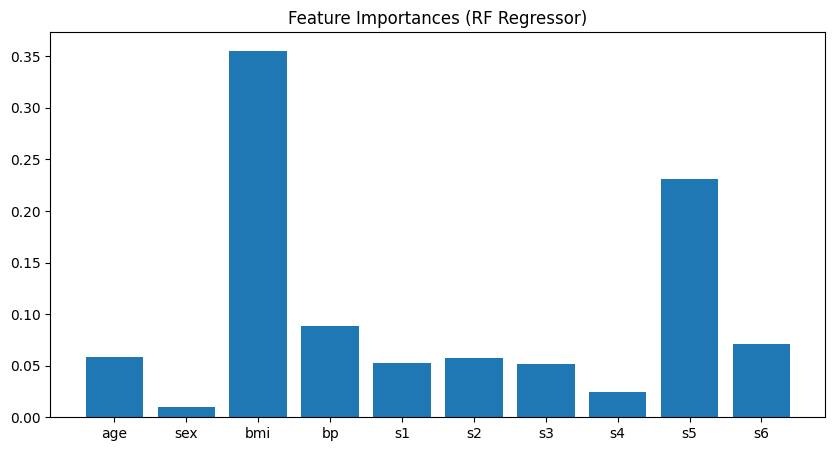

In [ ]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.bar(data.feature_names, rf_reg.feature_importances_)
plt.title("Feature Importances (RF Regressor)")
plt.show()


### 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.


In [ ]:
X, y = make_classification(n_samples=1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging
bag_clf = BaggingClassifier(n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)
print(f"Bagging Accuracy: {bag_clf.score(X_test, y_test):.4f}")

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(X_train, y_train)
print(f"Random Forest Accuracy: {rf_clf.score(X_test, y_test):.4f}")


Bagging Accuracy: 0.8850
Random Forest Accuracy: 0.8800


### 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.


In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")


Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8963


### 32. Train a Bagging Regressor with different numbers of base estimators and compare performance.


In [ ]:
X_reg, y_reg = make_regression(n_samples=500, noise=0.1, random_state=42)
X_tr, X_te, y_tr, y_te = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

for n in [10, 50, 100]:
    br = BaggingRegressor(n_estimators=n, random_state=42)
    br.fit(X_tr, y_tr)
    print(f"Estimators: {n}, MSE: {mean_squared_error(y_te, br.predict(X_te)):.2f}")


Estimators: 10, MSE: 5641.03
Estimators: 50, MSE: 4869.02
Estimators: 100, MSE: 5005.94


### 33. Train a Random Forest Classifier and analyze misclassified samples.


In [ ]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

misclassified = np.where(y_test != y_pred)[0]
print(f"Number of misclassified samples: {len(misclassified)}")
print(f"Indices of misclassified samples: {misclassified[:10]} ...")


Number of misclassified samples: 24
Indices of misclassified samples: [ 2  8 11 14 19 27 43 45 55 57] ...


### 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print(f"Decision Tree Accuracy: {dt.score(X_test, y_test):.4f}")

bg = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bg.fit(X_train, y_train)
print(f"Bagging Accuracy: {bg.score(X_test, y_test):.4f}")


Decision Tree Accuracy: 0.8750
Bagging Accuracy: 0.8850


### 35. Train a Random Forest Classifier and visualize the confusion matrix.


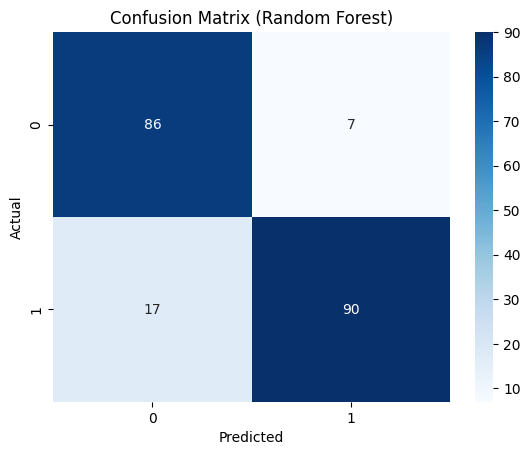

In [ ]:
cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.


In [ ]:
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=False, random_state=42))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

print(f"Stacking Classifier Accuracy: {stacking_clf.score(X_test, y_test):.4f}")


Stacking Classifier Accuracy: 0.8750


### 37. Train a Random Forest Classifier and print the top 5 most important features.


In [ ]:
# Using Breast Cancer dataset again for named features
data = load_breast_cancer()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(data.data, data.target)

importances = pd.Series(rf.feature_importances_, index=data.feature_names)
print(importances.nlargest(5))


worst area              0.139357
worst concave points    0.132225
mean concave points     0.107046
worst radius            0.082848
worst perimeter         0.080850
dtype: float64


### 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.


In [ ]:
bg = BaggingClassifier(n_estimators=50, random_state=42)
bg.fit(X_train, y_train)
y_pred = bg.predict(X_test)

print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")


Precision: 0.9468
Recall:    0.8318
F1-Score:  0.8856


### 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.


In [ ]:
depths = [1, 3, 5, 10, None]
for d in depths:
    rf = RandomForestClassifier(max_depth=d, random_state=42)
    rf.fit(X_train, y_train)
    print(f"Max Depth: {d}, Accuracy: {rf.score(X_test, y_test):.4f}")


Max Depth: 1, Accuracy: 0.8600
Max Depth: 3, Accuracy: 0.8600
Max Depth: 5, Accuracy: 0.8800
Max Depth: 10, Accuracy: 0.8850
Max Depth: None, Accuracy: 0.9000


### 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.


In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Bagging with Decision Tree
br_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
br_dt.fit(X_tr, y_tr)
print(f"Bagging (DT) MSE: {mean_squared_error(y_te, br_dt.predict(X_te)):.2f}")

# Bagging with KNN
br_knn = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=10, random_state=42)
br_knn.fit(X_tr, y_tr)
print(f"Bagging (KNN) MSE: {mean_squared_error(y_te, br_knn.predict(X_te)):.2f}")


Bagging (DT) MSE: 5641.03
Bagging (KNN) MSE: 21939.89


### 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)[:, 1]
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


ROC-AUC Score: 0.9379


### 42. Train a Bagging Classifier and evaluate its performance using cross-validation


In [ ]:
bg = BaggingClassifier(n_estimators=50, random_state=42)
cv_scores = cross_val_score(bg, X, y, cv=5)
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")


CV Scores: [0.94  0.905 0.9   0.92  0.885]
Mean CV Score: 0.9100


### 43. Train a Random Forest Classifier and plot the Precision-Recall curve


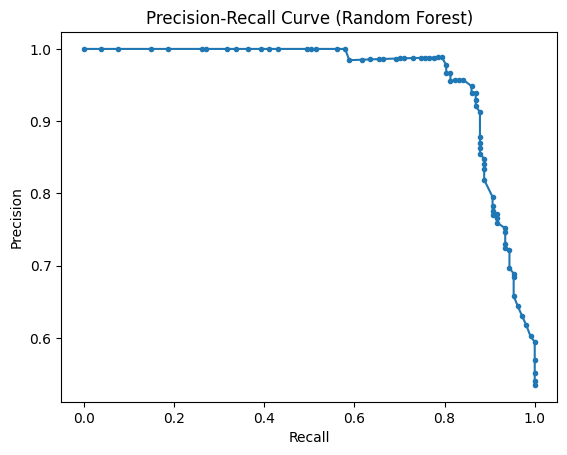

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve (Random Forest)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


### 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.


In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
print(f"Stacking (RF+LR) Accuracy: {stack.score(X_test, y_test):.4f}")


Stacking (RF+LR) Accuracy: 0.8600


### 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.


In [ ]:
# max_samples controls the size of the bootstrap sample
sample_ratios = [0.1, 0.5, 1.0]
for ratio in sample_ratios:
    br = BaggingRegressor(max_samples=ratio, n_estimators=50, random_state=42)
    br.fit(X_tr, y_tr)
    print(f"Max Samples ratio: {ratio}, MSE: {mean_squared_error(y_te, br.predict(X_te)):.2f}")


Max Samples ratio: 0.1, MSE: 14452.50
Max Samples ratio: 0.5, MSE: 5996.82
Max Samples ratio: 1.0, MSE: 4869.02
